In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from textblob import Word
from nltk.corpus import stopwords
import nltk

In [1]:
import nltk
nltk.download('wordnet')

In [ ]:
cats_pol=[ 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc']

In [ ]:
dataset = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

In [ ]:
df = pd.DataFrame()
df["data"] = dataset["data"]
df["target"] = dataset["target"]
df["target_names"] = df.target.apply(lambda row: dataset["target_names"][row])
df.head()

,data,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [ ]:
vectorizer = CountVectorizer(max_df=0.6,lowercase=1, ngram_range =(1,3) ,stop_words='english')
X = vectorizer.fit_transform(dataset.data)
h=X.toarray

In [ ]:
stopword = stopwords.words('english')

In [ ]:
def clean_text(text):
    return " ".join([ Word(word).lemmatize() for word in re.sub("[^A-Za-z0-9]+", " ", text).lower().split() if word not in stopword])    

In [ ]:
df["data_str"] = df.data.apply(lambda row: clean_text(row) )

In [2]:
#vectorizer = TfidfVectorizer(ngram_range=(1,1))
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = CountVectorizer(max_df=0.8,lowercase=0, ngram_range =(1,8) )
text_to_vector = vectorizer.fit_transform(df.data_str.values)
X_embedded = TSNE(perplexity=10).fit_transform(text_to_vector)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8, init='random', max_iter=100, n_init=1, verbose=0)
km.fit(X_embedded)
labels = km.labels_
metrics.silhouette_score(X_embedded, labels, metric='euclidean')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


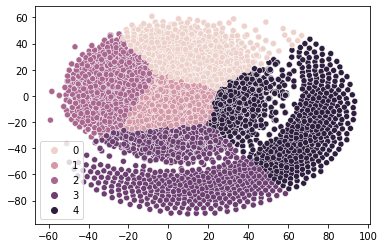

In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=km.labels_, legend='full')

Ngram  (1, 1)
Perplexity  10


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


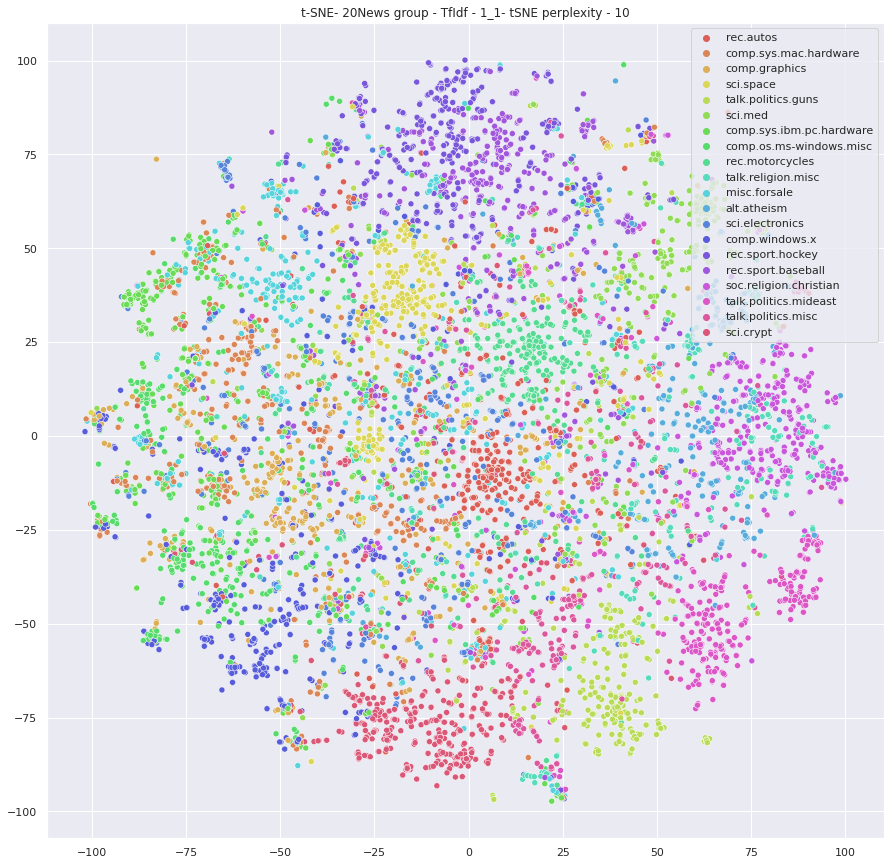

Ngram  (1, 2)
Perplexity  10


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


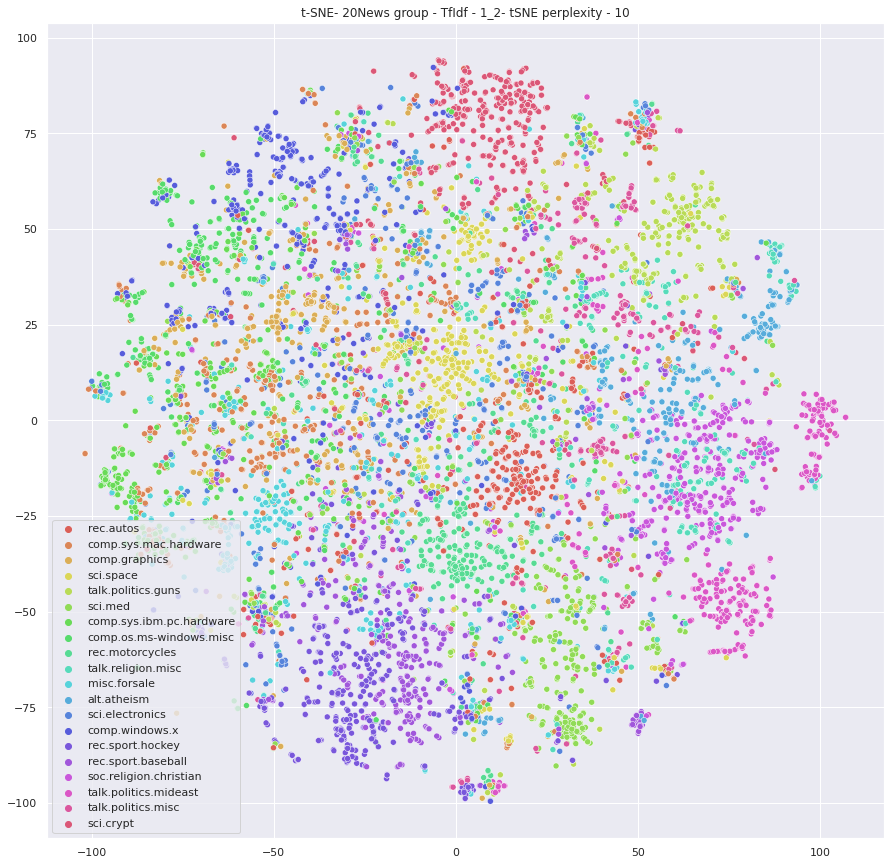

Ngram  (1, 3)
Perplexity  10


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


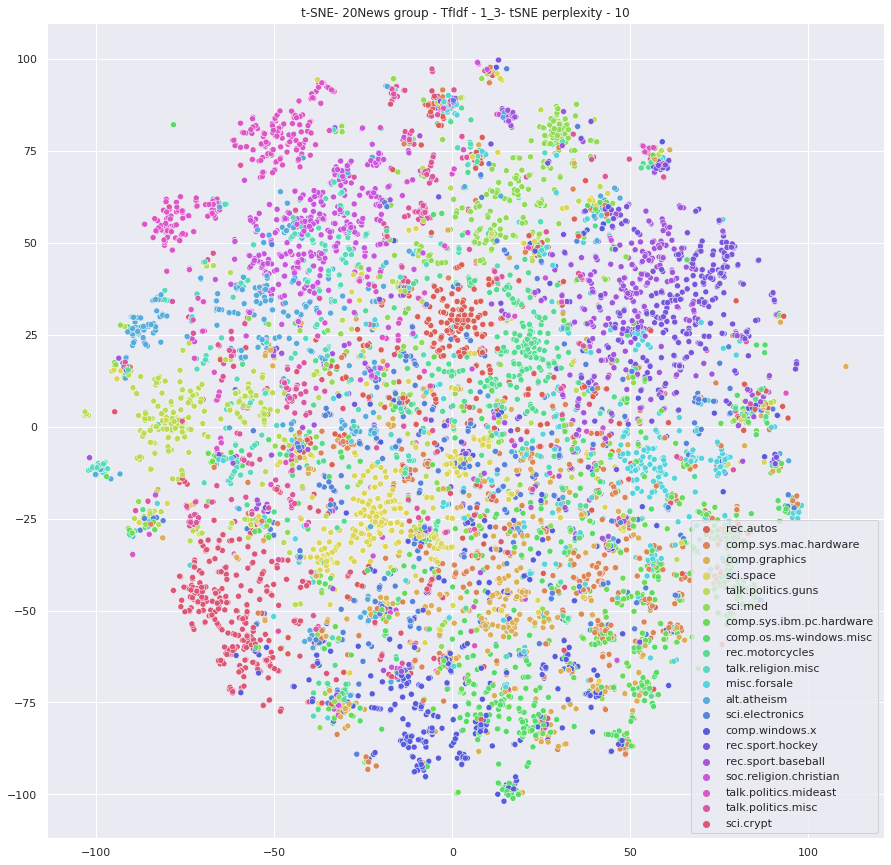

Ngram  (2, 2)
Perplexity  10


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


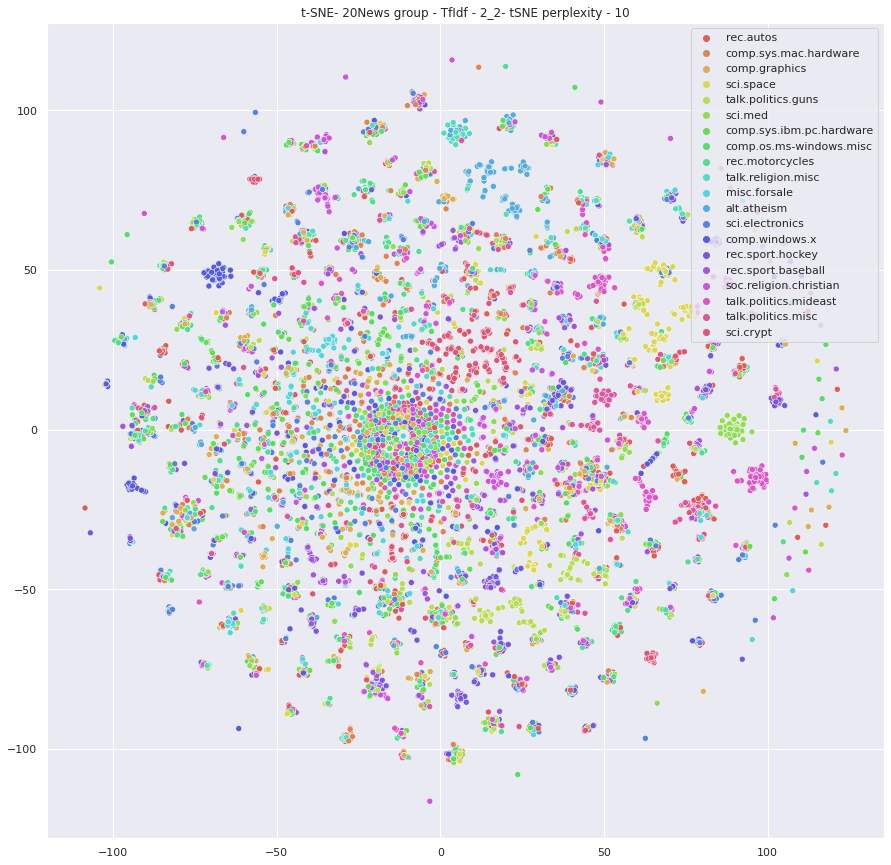

Ngram  (3, 3)
Perplexity  10


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


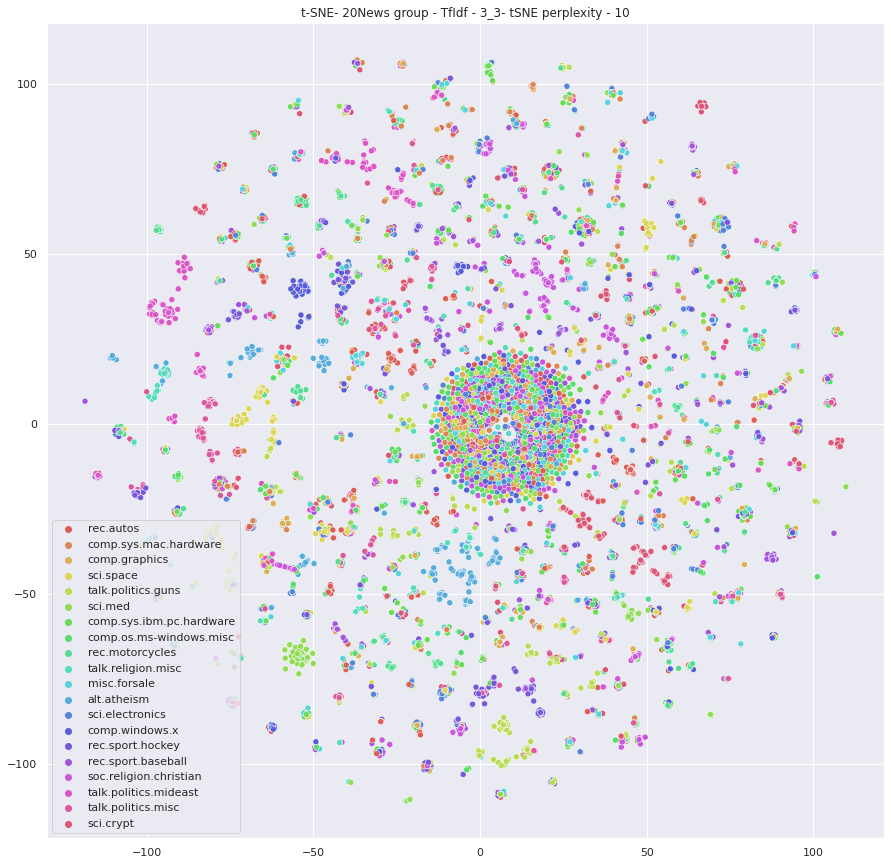

Ngram  (1, 1)
Perplexity  30


KeyboardInterrupt: ignored

In [ ]:
perp_components = defaultdict(dict)
for i in [10]:
    for ngram in [(1,1)]:
        vectorizer = TfidfVectorizer(ngram_range=ngram, max_features= 2**10)
        text_to_vector = vectorizer.fit_transform(df.data_str.values)
        print("Ngram ",ngram )
        print("Perplexity ", i)
        X_embedded = TSNE(perplexity=i ).fit_transform(text_to_vector)
        ngram_str = str(ngram[0])+"_"+str(ngram[1])
        perp_components[i][ngram_str] = X_embedded
        # sns settings
        sns.set(rc={'figure.figsize':(15,15)})
        # colors
        palette = sns.color_palette("hls", len(set(df.target_names.values.tolist())))        
        y = df.target_names.values.tolist()
        # plot
        sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
        title = "t-SNE- 20News group - TfIdf - "+ngram_str+"- tSNE perplexity - "+str(i)
        plt.savefig(title)
        plt.title(title)
        #plt.show()
